# 이산형 분포에서의 우도비 검정 (Likelihood Ratio Test)

## 우도비 검정이란?
우도비 검정(Likelihood Ratio Test, LRT)은 두 개의 통계 모델을 비교하는 데 사용되는 검정 방법이다. 이 검정은 주로 복잡한 모델과 단순한 모델을 비교하여, 단순한 모델이 데이터에 잘 맞는지 여부를 평가하는 데 사용된다. 우도비 검정의 검정 통계량은 다음과 같이 정의된다:
$$
D = -2 \log \left( \frac{L_0}{L_1} \right)
$$
여기서 $L_0$는 귀무가설 하에서의 최대 우도, $L_1$는 대립가설 하에서의 최대 우도이다. 이 통계량 $D$는 카이제곱 분포를 따르며, 자유도는 두 모델 간의 파라미터 수 차이와 같다.

## 이산형 분포에서의 우도비 검정
이산형 분포에서는 주로 포아송 분포와 다항 분포와 같은 분포를 사용하여 우도비 검정을 수행한다. 이 예제에서는 포아송 분포를 사용하여 우도비 검정을 수행하는 방법을 살펴본다.

## 우도비 검정의 단계
1. **모델 설정**: 귀무가설과 대립가설을 설정한다.
2. **최대 우도 추정**: 각각의 모델에 대해 최대 우도를 추정한다.
3. **검정 통계량 계산**: 우도비 검정 통계량 $D$를 계산한다.
4. **p-값 계산**: 검정 통계량의 p-값을 계산하여 귀무가설을 기각할지 여부를 결정한다.

## 평균과 분산
포아송 분포의 평균과 분산은 다음과 같다:
- 평균: $E[X] = \lambda$
- 분산: $Var[X] = \lambda$

## 파이썬을 이용한 우도비 검정 예시

In [1]:
import numpy as np
from scipy.stats import poisson, chi2
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
data = np.random.poisson(lam=3, size=100)

# 최대 우도 추정 함수
def log_likelihood_poisson(lambda_, data):
    return np.sum(poisson.logpmf(data, lambda_))

# 귀무가설 하에서의 최대 우도 추정
lambda_0 = np.mean(data)  # MLE under null hypothesis
L0 = log_likelihood_poisson(lambda_0, data)

# 대립가설 하에서의 최대 우도 추정
lambda_1 = 3.5  # MLE under alternative hypothesis (example value)
L1 = log_likelihood_poisson(lambda_1, data)

# 우도비 검정 통계량 계산
D = -2 * (L0 - L1)
print(f"우도비 검정 통계량: {D}")

# p-값 계산
p_value = chi2.sf(D, df=1)  # 자유도 1
print(f"p-값: {p_value}")

우도비 검정 통계량: -15.946505319190635
p-값: 1.0


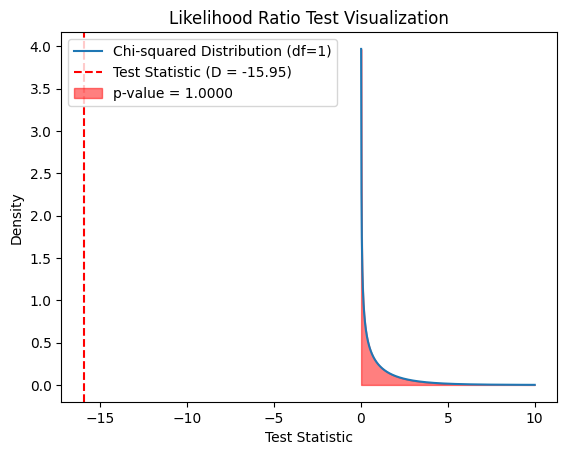

In [2]:
# 우도비 검정 결과 시각화
x = np.linspace(0, 10, 1000)
y = chi2.pdf(x, df=1)

plt.plot(x, y, label='Chi-squared Distribution (df=1)')
plt.axvline(x=D, color='r', linestyle='--', label=f'Test Statistic (D = {D:.2f})')
plt.fill_between(x, 0, y, where=(x >= D), color='red', alpha=0.5, label=f'p-value = {p_value:.4f}')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.title('Likelihood Ratio Test Visualization')
plt.legend()
plt.show()

## 패키지를 사용한 우도비 검정
이제 `statsmodels` 패키지를 사용하여 동일한 우도비 검정을 수행해보자.

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 데이터 생성
np.random.seed(42)
data = np.random.poisson(lam=3, size=100)

# 데이터 준비
data_df = pd.DataFrame({'count': data})

# 그룹을 나누는 변수 추가 (예시로 평균을 기준으로 나눔)
data_df['group'] = np.where(data_df['count'] > np.mean(data), 1, 0)

# 귀무가설 모델 (포아송 회귀)
null_model = smf.poisson('count ~ 1', data=data_df).fit()

# 대립가설 모델 (포아송 회귀)
alt_model = smf.poisson('count ~ group', data=data_df).fit()

# 우도비 검정 수행
lr_stat = -2 * (null_model.llf - alt_model.llf)
df_diff = alt_model.df_model - null_model.df_model
p_value = chi2.sf(lr_stat, df_diff)

print(f"우도비 검정 통계량: {lr_stat}")
print(f"p-값: {p_value}")

Optimization terminated successfully.
         Current function value: 1.961161
         Iterations 1
Optimization terminated successfully.
         Current function value: 1.551192
         Iterations 6
우도비 검정 통계량: 81.99379641840233
p-값: 1.365144943082421e-19


위 코드를 통해 패키지를 사용하여 간단하게 우도비 검정을 수행할 수 있다. 이는 직접 구현한 방법과 동일한 결과를 제공하며, 복잡한 모델을 다룰 때 매우 유용하다.